#Step 1:
**create the required folders**

In [1]:
!mkdir bark_voices

In [2]:
!mkdir bark_voices/speaker

#Step 2:

**If you're cloning a new voice:**

Upload a single .wav file  that you would like to use for cloning, into the **bark_voices/speaker** folder. It should look something like this ⬇

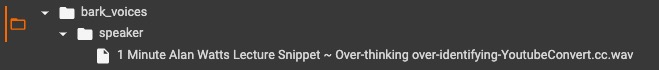



---



---



**If you're loading the weights of a previously cloned voice:**


Upload the .npz file into the **bark_voices/speaker** folder. It should look something like this ⬇

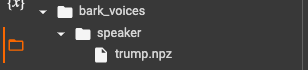

#Step 3:
install TTS and Bark

In [3]:
#install coqui TTS
!pip install pandas==2.0.3 -q
!pip install numpy==1.25 -q
!pip install TTS -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 98.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.0.3 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 76.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-stubs 2.1.4.231227 requires numpy>=1.26.0; python_version < "3.13", but you have numpy 1.25.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 66.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ...

In [4]:
!git lfs install
!git clone https://huggingface.co/suno/bark

Git LFS initialized.
Cloning into 'bark'...
remote: Enumerating objects: 847, done.
remote: Total 847 (delta 0), reused 0 (delta 0), pack-reused 847 (from 1)
Receiving objects: 100% (847/847), 1.55 MiB | 11.03 MiB/s, done.
Resolving deltas: 100% (27/27), done.
Filtering content: 100% (790/790), 12.67 GiB | 25.44 MiB/s, done.
Encountered 2 file(s) that may not have been copied correctly on Windows:
	pytorch_model.bin
	text_2.pt

See: `git lfs help smudge` for more details.


#Step 4:


In [5]:
import torch
from TTS.tts.configs.bark_config import BarkConfig
from TTS.tts.models.bark import Bark
import scipy

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

config = BarkConfig()
model = Bark.init_from_config(config)
model.load_checkpoint(config, checkpoint_dir="bark/", eval=True)
model.to(device)
model.eval()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:134: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)
Downloading: "https://dl.fbaipublicfiles.com/encodec/v0/encodec_24khz-d7cc33bc.th" to /root/.cache/torch/hub/checkpoints/encodec_24khz-d7cc33bc.th
100%|██████████| 88.9M/88.9M [00:01<00:00, 76.9MB/s]
/usr/local/lib/python3.10/dist-packages/TTS/tts/layers/bark/load_model.py:121: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), whic

Bark(
  (semantic_model): GPT(
    (transformer): ModuleDict(
      (wte): Embedding(129600, 1024)
      (wpe): Embedding(1024, 1024)
      (drop): Dropout(p=0.0, inplace=False)
      (h): ModuleList(
        (0-23): 24 x Block(
          (ln_1): LayerNorm()
          (attn): CausalSelfAttention(
            (c_attn): Linear(in_features=1024, out_features=3072, bias=False)
            (c_proj): Linear(in_features=1024, out_features=1024, bias=False)
            (attn_dropout): Dropout(p=0.0, inplace=False)
            (resid_dropout): Dropout(p=0.0, inplace=False)
          )
          (ln_2): LayerNorm()
          (mlp): MLP(
            (c_fc): Linear(in_features=1024, out_features=4096, bias=False)
            (c_proj): Linear(in_features=4096, out_features=1024, bias=False)
            (dropout): Dropout(p=0.0, inplace=False)
            (gelu): GELU(approximate='none')
          )
        )
      )
      (ln_f): LayerNorm()
    )
    (lm_head): Linear(in_features=1024, out_feature

Enter the text you want to generate ⬇

In [10]:
text = """
manishivena asalu nuvvu
"""

In [11]:
text = f"{text}"
output_dict = model.synthesize(text, config, speaker_id="speaker", voice_dirs="/content/bark_voices/")
sample_rate = 24000
scipy.io.wavfile.write("bark_out.wav", rate=sample_rate, data=output_dict["wav"])

100%|██████████| 17/17 [00:19<00:00,  1.15s/it]


The audio file will be saved as "bark_out.wav". You can find and download it from the files section.

You can listen to the audio directly by running this cell ⬇

In [12]:
from IPython.display import Audio

audio_file_path = "/content/bark_out.wav"
Audio(audio_file_path)

#How to download and use the weights of the cloned voice

After the cloning is completed, you can find a new file with a **.npz** extension. Download this file. You can use this file to create TTS without needing to clone the same voice again from scratch.

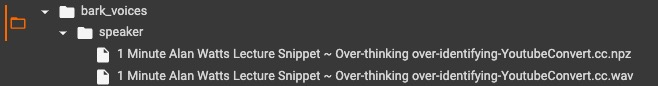

Next time, upload the **.npz** file in bark_voices/speaker. No need to upload .wav file again

#Bypass 14 sec limit

In [ ]:
import numpy as np
long_string = """
Hello and welcome to Tech Today, I'm your host Alex, your tech correspondent. Today, we'll be discussing the latest developments in artificial intelligence and its impact on journalism. According to a report from The New York Times, Google is testing a tool that uses AI to write news stories, and they've even started pitching it to publications such as The New York Times itself, The Washington Post, and News Corp, the owner of The Wall Street Journal.

This AI tool, codenamed "Genesis," has the potential to automate certain tasks for journalists, acting as a personal assistant and freeing up time for other important aspects of news reporting. However, some executives who were presented with the tool expressed their concerns, finding it unsettling, as it seemed to disregard the effort put into producing accurate news stories.

Google, on the other hand, sees this tool as a form of "responsible technology." They clarified that the purpose of the tool is to assist journalists, especially those working for smaller publishers, by providing options for headlines and different writing styles. They emphasized that these AI-enabled tools are not intended to replace the essential role of journalists in reporting, creating, and fact-checking articles.

This move by Google aligns with recent developments in the news industry, where organizations like NPR and Insider have expressed their intentions to explore the responsible use of AI in their newsrooms. Although some news organizations, like The Associated Press, have already been using AI to generate stories for specific areas like corporate earnings, it constitutes a small fraction of their overall articles, which are still predominantly written by journalists.

However, the utilization of AI tools like Genesis does raise concerns. Articles that are solely generated by AI, without proper fact-checking or thorough editing, have the potential to spread misinformation. Earlier this year, CNET, an American media website, had a similar experience when they quietly introduced generative AI-produced articles. The outcome, unfortunately, did not go as planned. CNET had to issue corrections on over half of the articles generated by AI due to factual errors and possible plagiarism. Some articles even had to be substantially updated by staff writers, leading to an editor's note acknowledging the AI-assisted earlier version.

This highlights the importance of ensuring that AI tools are used responsibly in journalism. While they can offer valuable assistance in certain aspects of the writing process, the role of human journalists remains crucial in maintaining accuracy and integrity in news reporting.

That's all for today's episode. Thank you for tuning in to Tech Today. I'm Alex, your tech correspondent, and I'll be back soon with more exciting tech news. Stay tuned!
"""

In [ ]:
import nltk  # we'll use this to split into sentences
import numpy as np
import nltk
nltk.download("punkt")
sentences = nltk.sent_tokenize(long_string)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
SAMPLE_RATE = 22050
silence = np.zeros(int(0.25 * SAMPLE_RATE))  # quarter second of silence
pieces = []
for sentence in sentences:
    audio_array = model.synthesize(sentence, config, speaker_id="speaker", voice_dirs="/content/bark_voices/")
    pieces += [audio_array['wav'], silence.copy()]
scipy.io.wavfile.write("combined_bark_out.wav", rate=sample_rate, data= np.concatenate(pieces))